In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling (1).xlsx',sheet_name='Data')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
# Remove irrelevant data
df = df.drop(['ID','ZIP Code'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


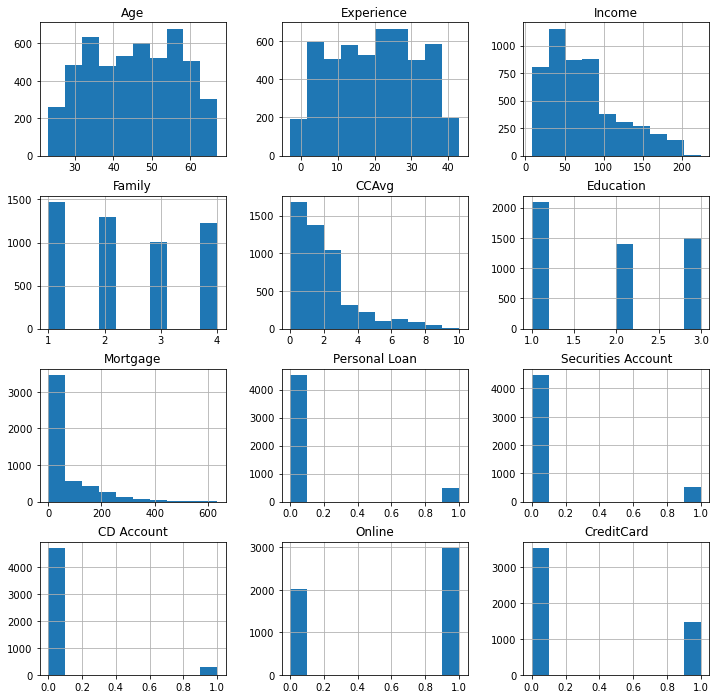

In [8]:
df.hist(figsize=(12,12))
plt.show()

<AxesSubplot:>

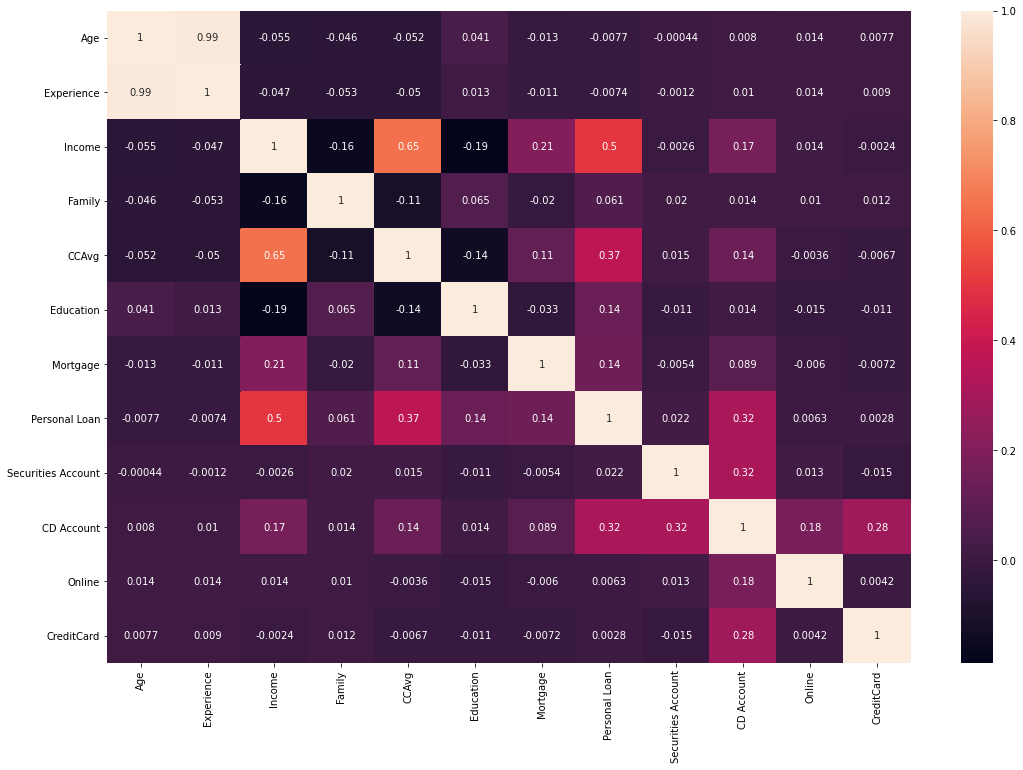

In [9]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot = True)

In [10]:
from sklearn import tree
from sklearn import preprocessing
x = df.drop(['Personal Loan'], axis=1)
y = df.iloc[:, 7:8]

In [11]:
model = tree.DecisionTreeClassifier(max_depth=8)
model.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
model.score(x,y)

0.9954

In [13]:
# To find more important feature we use Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
rf.oob_score_

0.9882

In [15]:
for x,imp in zip(x,rf.feature_importances_):
    print(x,":",imp);

Age : 0.044805488346851656
Experience : 0.04387439901498937
Income : 0.3469427405030581
Family : 0.09792858369730006
CCAvg : 0.18150943802810762
Education : 0.16398101591251224
Mortgage : 0.044334463031769314
Securities Account : 0.0055039670435755
CD Account : 0.05296893425983729
Online : 0.008485578968777671
CreditCard : 0.009665391193221127


__Inference:__

Income, CCAvg, Education, Family have value more than 0.05 which means they are important features and affect the prediction of Personal Loan

In [16]:
imp = df[['Income','CCAvg','Education','Family']]

In [17]:
rf.fit(imp,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
rf.oob_score_

0.9874

In [23]:
predictors=df[['Income','Family','CCAvg','Education']]
tree_model=tree.DecisionTreeClassifier(max_depth=8)
tree_model.fit(predictors,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
tree_model.score(predictors,y)

0.9956

In [25]:
with open('dtree_loan.dot','w')as f:
    f=tree.export_graphviz(tree_model,feature_names=['Income','Family','CCAvg','Education'],out_file=f);

# Tree formation

In [33]:
from sklearn.tree import export_text
feature=["Income","Family","CCAvg","Education"]
r=export_text(tree_model,feature_names=feature)
print(r)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- CCAvg <= 1.65
|   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |--- CCAvg <= 1.05
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- CCAvg >  1.05
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Family >  1.50
|   |   |   |   |   |   |   |--- CCAvg <= 1.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- CCAvg >  1.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CCAvg >  1.65
|   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |--- CCAvg <= 2.83
|   